<a href="https://colab.research.google.com/github/ki0601/kishan0601/blob/main/healthcare_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load dataset
df = pd.read_csv("synthetic_diabetes.csv")

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,76,57,20,74,31.8,0.436,27,0
1,1,140,91,25,73,30.3,0.589,20,1
2,2,161,77,22,99,32.2,0.564,35,1
3,0,106,65,26,77,35.6,1.001,19,0
4,2,89,79,29,72,30.7,0.999,11,0
...,...,...,...,...,...,...,...,...,...
763,1,120,70,18,99,32.0,0.031,32,1
764,1,136,61,25,71,33.9,0.572,22,1
765,2,109,81,25,112,31.3,0.047,37,0
766,2,44,79,18,80,25.8,0.067,40,0


In [ ]:
# Preview data
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,76,57,20,74,31.8,0.436,27,0
1,1,140,91,25,73,30.3,0.589,20,1
2,2,161,77,22,99,32.2,0.564,35,1
3,0,106,65,26,77,35.6,1.001,19,0
4,2,89,79,29,72,30.7,0.999,11,0
5,1,138,58,33,78,29.1,0.402,19,0
6,1,126,69,12,107,29.1,0.434,37,1
7,2,130,73,16,117,32.9,0.418,37,1
8,0,91,63,27,131,32.0,0.801,25,0
9,1,91,78,27,121,27.5,0.401,25,0


In [ ]:
 df.shape

(768, 9)

In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,1.320312,110.330729,69.924479,22.730469,78.882812,29.860286,0.412255,27.308594,0.501302
std,1.029679,30.721188,10.225465,7.173689,20.036975,3.087232,0.289810,7.676635,0.500324
min,0.000000,33.000000,39.000000,6.000000,22.000000,19.300000,0.001000,2.000000,0.000000
25%,1.000000,88.000000,63.000000,17.000000,65.000000,27.900000,0.182000,22.000000,0.000000
50%,1.000000,111.000000,70.000000,23.000000,78.000000,29.800000,0.372000,27.000000,1.000000
75%,2.000000,133.000000,77.000000,28.000000,92.000000,31.800000,0.573250,33.000000,1.000000
max,6.000000,209.000000,101.000000,42.000000,145.000000,39.000000,1.758000,46.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
1,385
0,383


In [ ]:
# Number of duplicated rows
print("Duplicates:", df.duplicated().sum())

# Remove duplicates if any
df = df.drop_duplicates()


Duplicates: 0


In [ ]:
# Missing values
print(df.isnull().sum())

# Percentage of missing values
print((df.isnull().sum() / len(df)) * 100)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


In [ ]:
# Fill missing numeric values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill specific column using mean
# df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())


In [ ]:
# Columns where 0 is invalid
zero_check_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with NaN
df[zero_check_columns] = df[zero_check_columns].replace(0, np.nan)

# Re-check missing after replacing 0s
print(df.isnull().sum())

# Impute again with median
df[zero_check_columns] = df[zero_check_columns].fillna(df[zero_check_columns].median())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


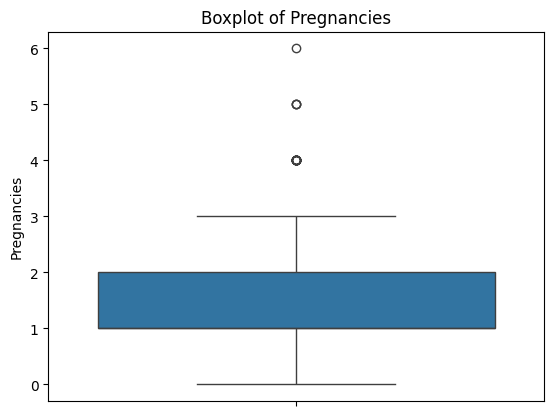

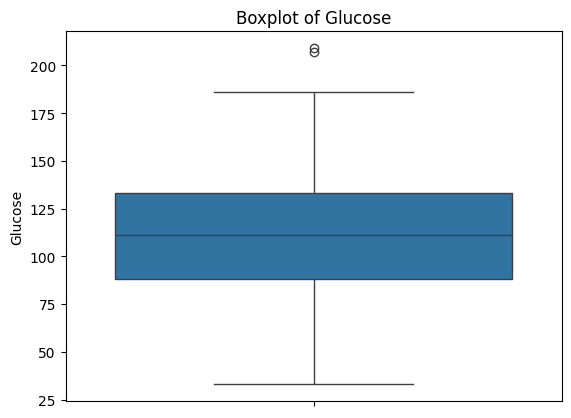

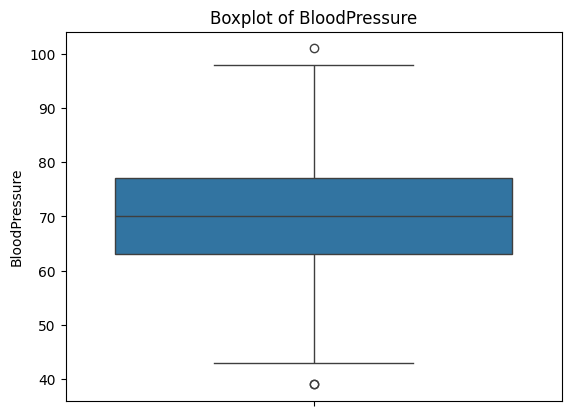

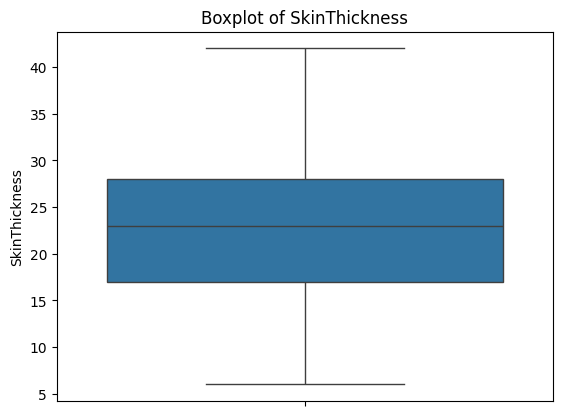

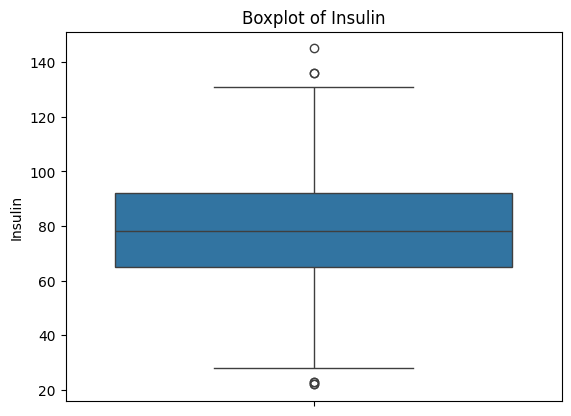

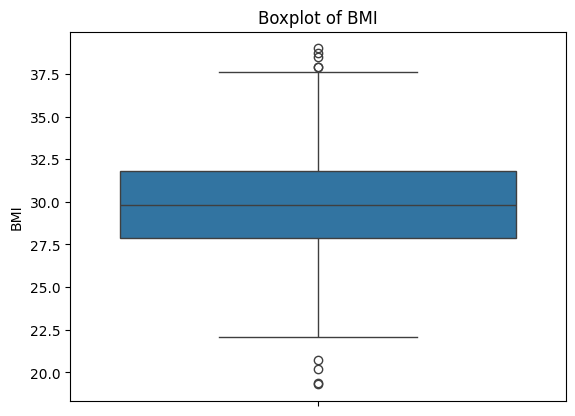

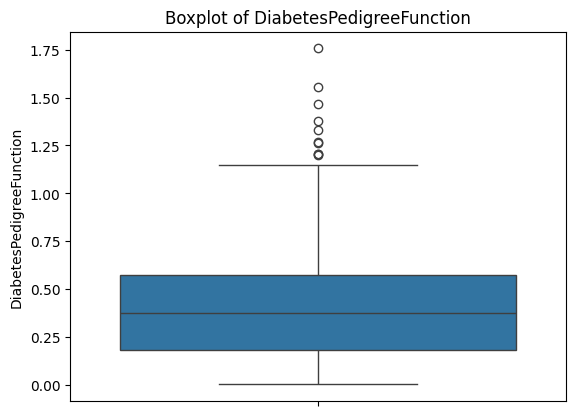

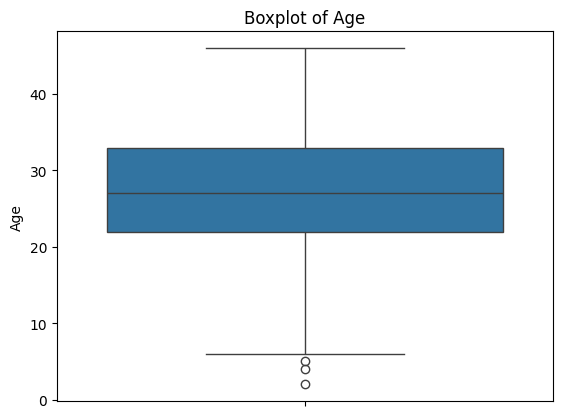

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers with boxplots
for col in df.columns[:-1]:
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Remove outliers using IQR method (for one column or in a loop)
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Insulin'] >= (Q1 - 1.5 * IQR)) & (df['Insulin'] <= (Q3 + 1.5 * IQR))]


In [ ]:
# Ensure types are correct
df['Pregnancies'] = df['Pregnancies'].astype(int)
df['Outcome'] = df['Outcome'].astype(int)


In [ ]:
# Check for nulls again
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Preview cleaned data
print(df.head())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       76             57             20       74  31.8   
1            1      140             91             25       73  30.3   
2            2      161             77             22       99  32.2   
3            0      106             65             26       77  35.6   
4            2     

In [ ]:
df.to_csv("cleaned_diabetes_data.csv", index=False)


In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,76,57,20,74,31.8,0.436,27,0
1,1,140,91,25,73,30.3,0.589,20,1
2,2,161,77,22,99,32.2,0.564,35,1
3,0,106,65,26,77,35.6,1.001,19,0
4,2,89,79,29,72,30.7,0.999,11,0
...,...,...,...,...,...,...,...,...,...
763,1,120,70,18,99,32.0,0.031,32,1
764,1,136,61,25,71,33.9,0.572,22,1
765,2,109,81,25,112,31.3,0.047,37,0
766,2,44,79,18,80,25.8,0.067,40,0


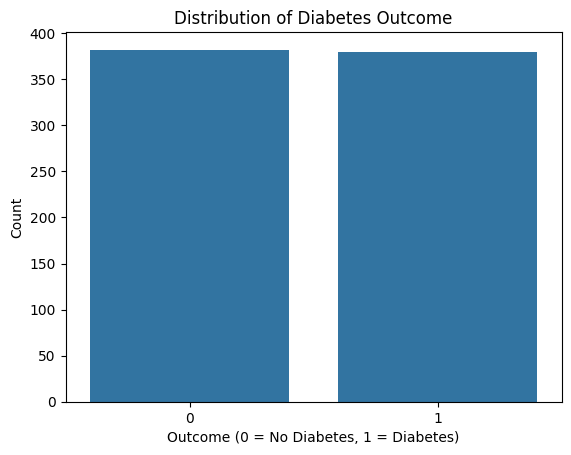

Outcome distribution (%):
 Outcome
0    50.197109
1    49.802891
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outcome distribution
sns.countplot(x='Outcome', data=df)
plt.title("Distribution of Diabetes Outcome")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()

# Percentage distribution
outcome_counts = df['Outcome'].value_counts(normalize=True) * 100
print("Outcome distribution (%):\n", outcome_counts)


In [ ]:
# Compare feature averages by class
print(df.groupby('Outcome').mean())


         Pregnancies     Glucose  BloodPressure  SkinThickness    Insulin  \
Outcome                                                                     
0           1.361257  100.424084      69.895288      25.306283  79.230366   
1           1.282322  120.284960      69.965699      20.050132  78.651715   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        29.807853                  0.430291  24.945026  
1        29.897098                  0.395879  29.744063  


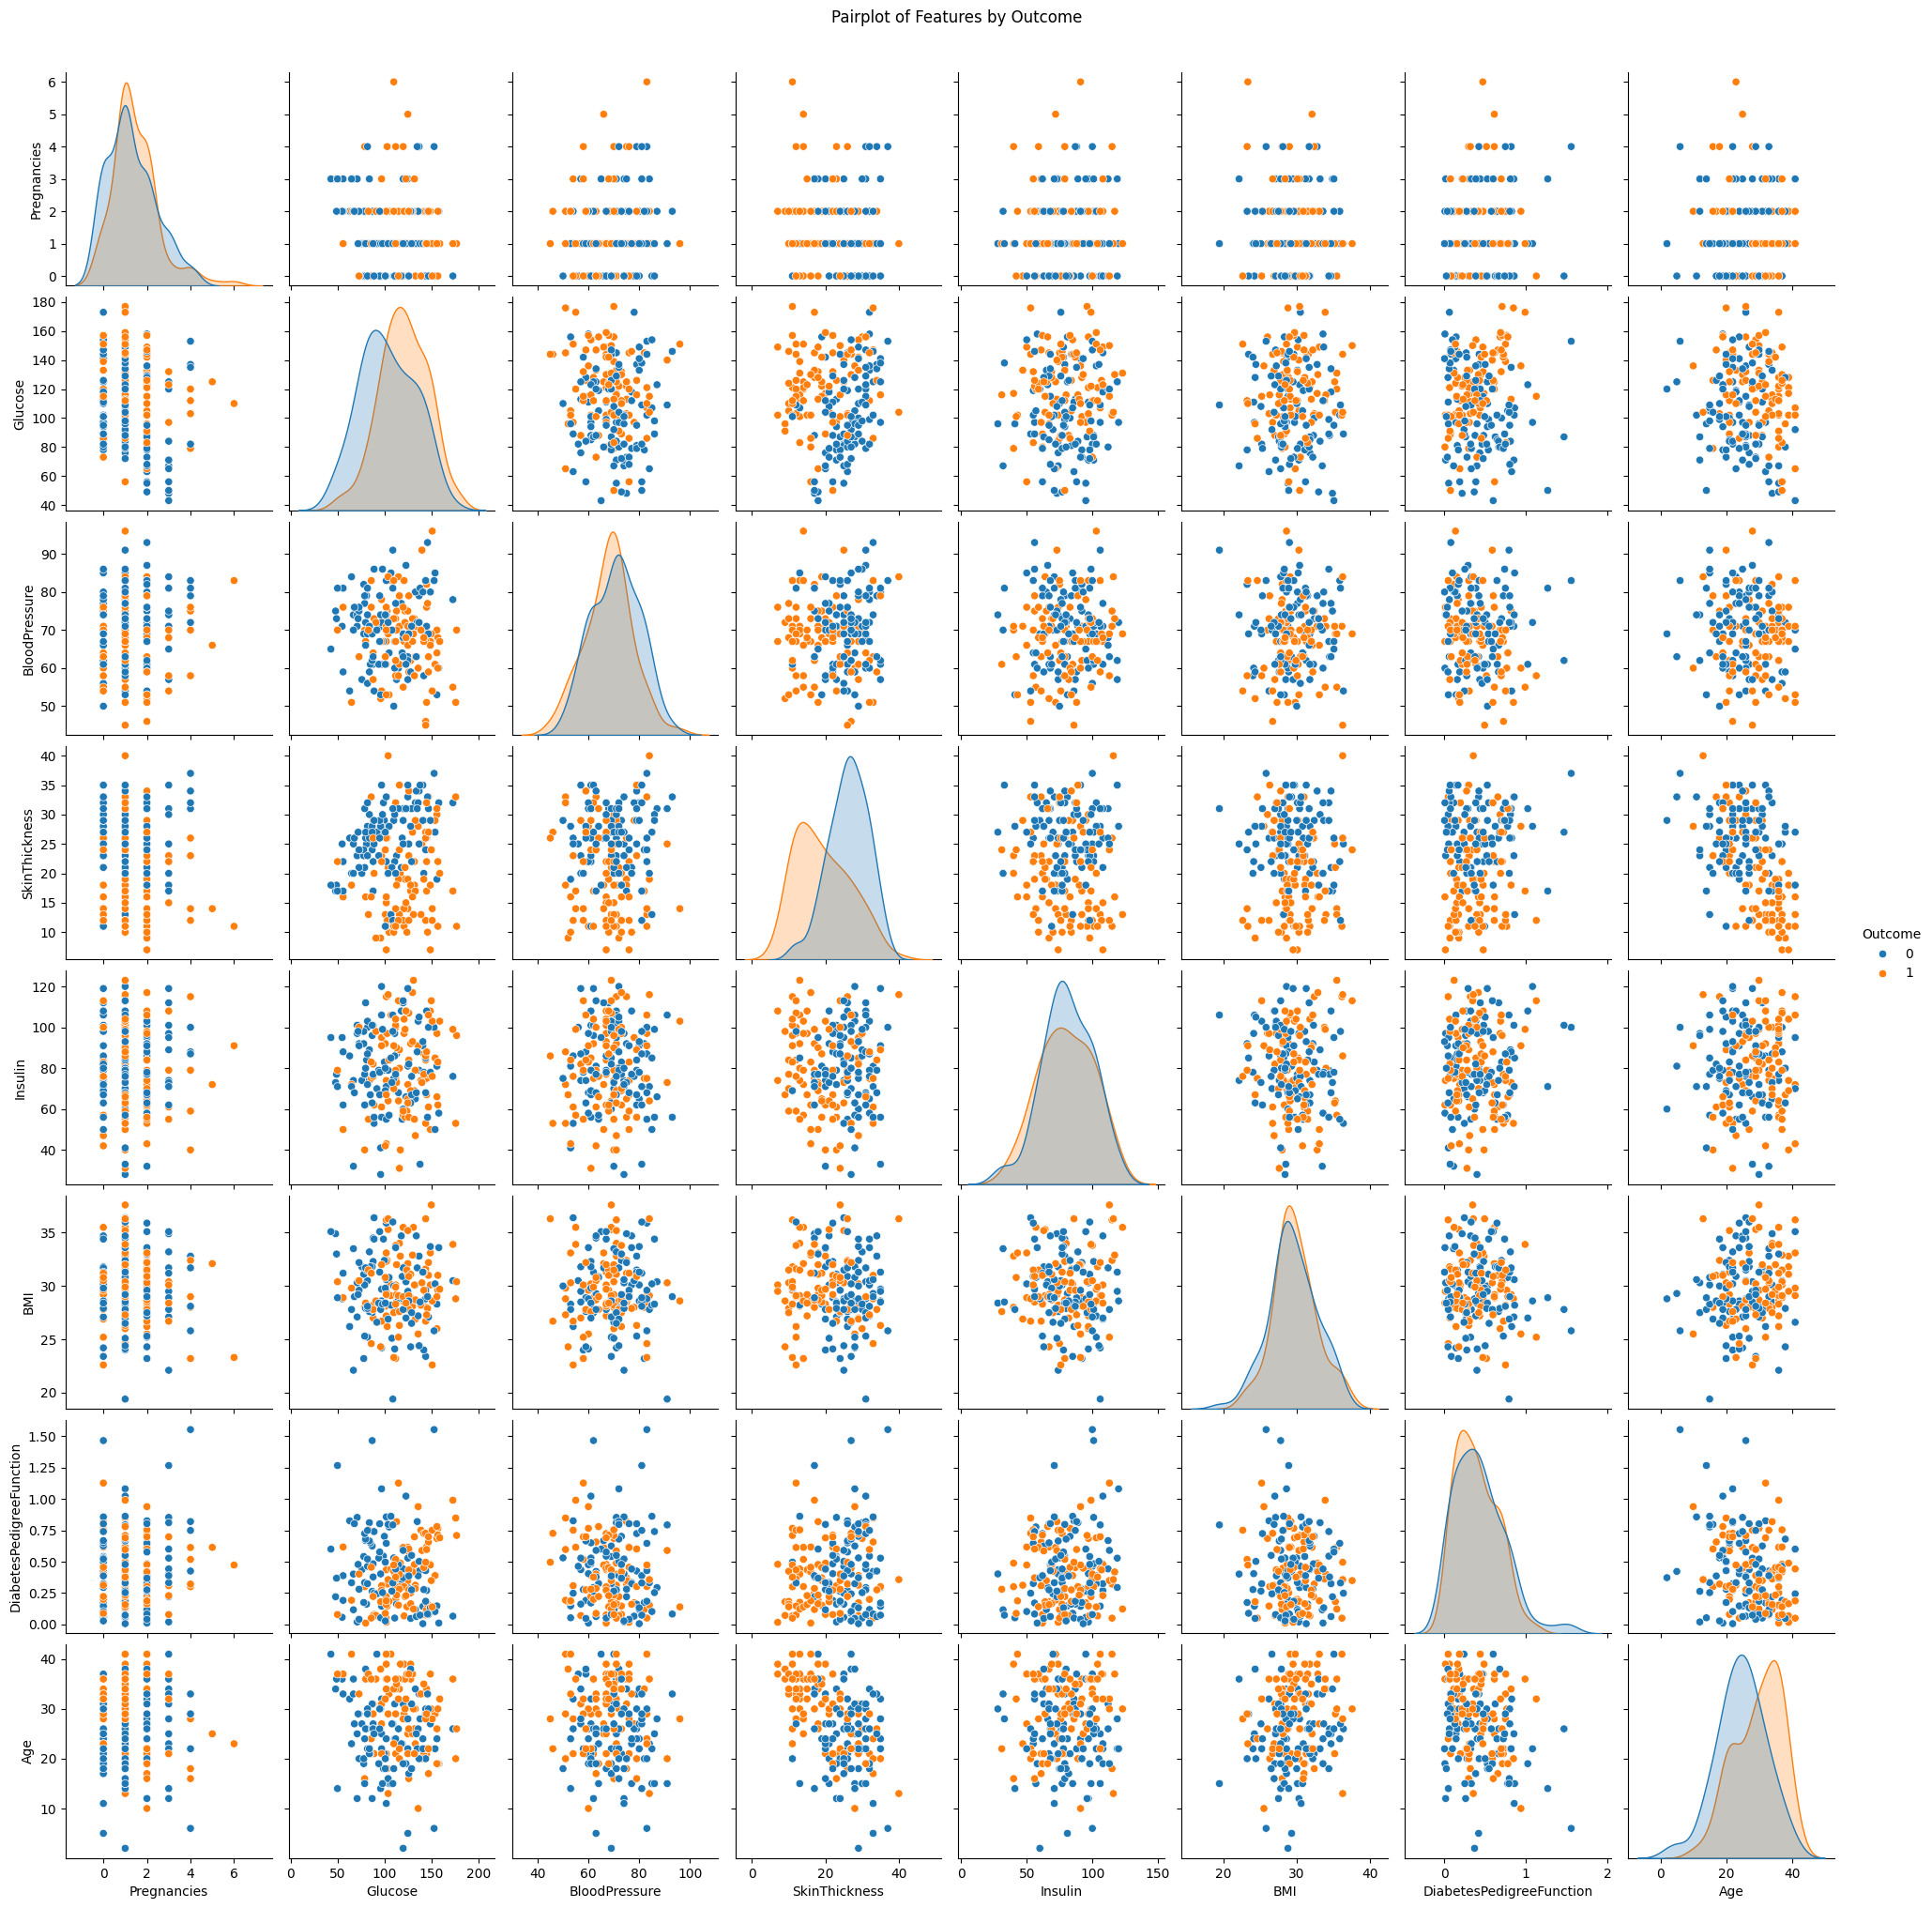

In [ ]:
# Only use a subset for speed
sns.pairplot(df.sample(200), hue='Outcome')
plt.suptitle("Pairplot of Features by Outcome", y=1.02)
plt.show()


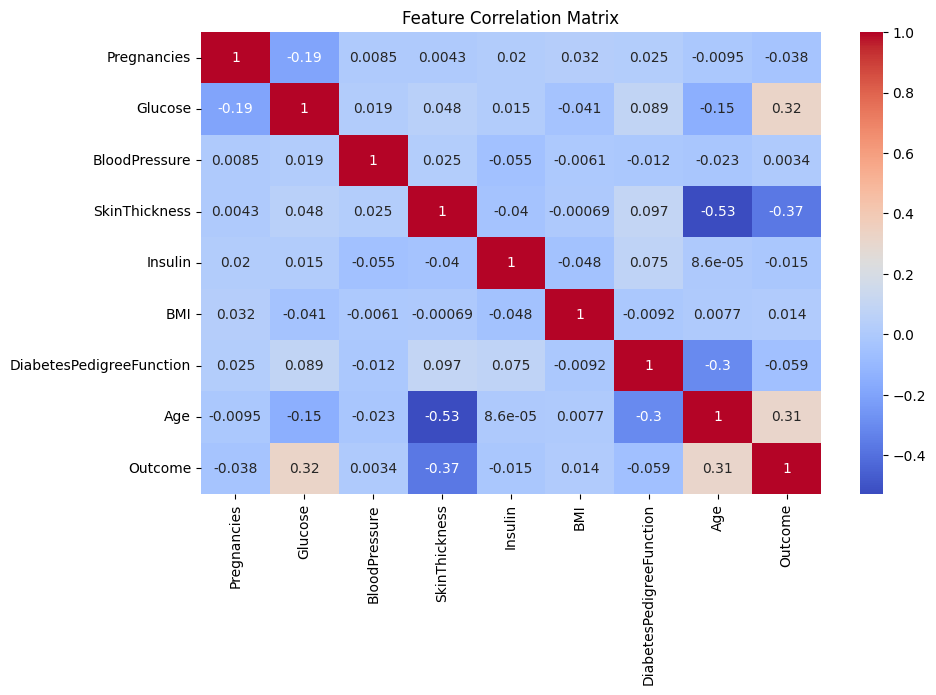

In [ ]:
# Compute correlation
correlation_matrix = df.corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


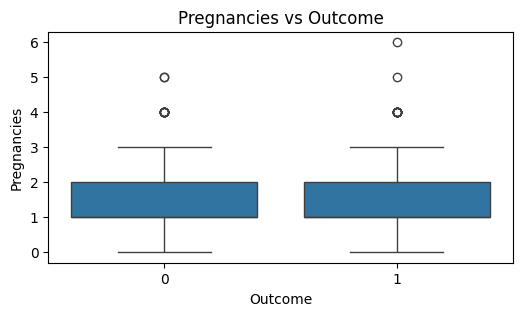

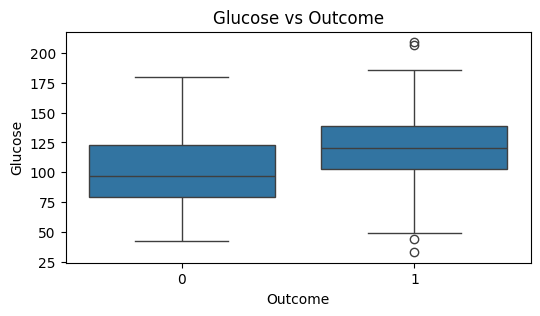

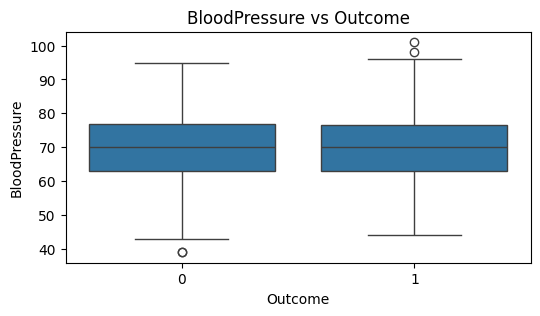

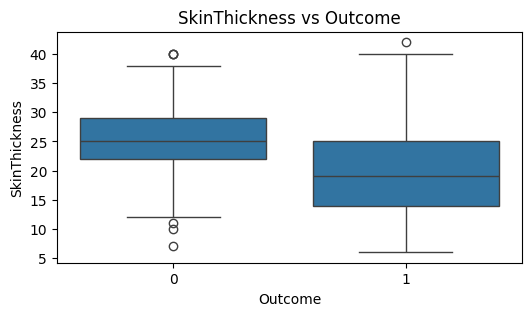

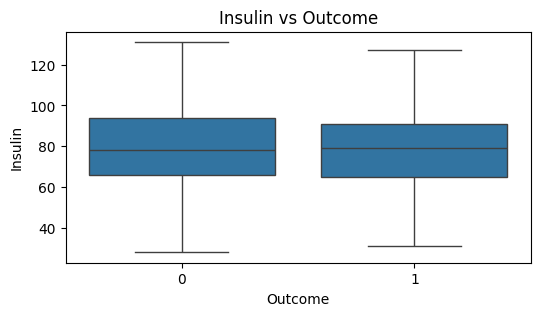

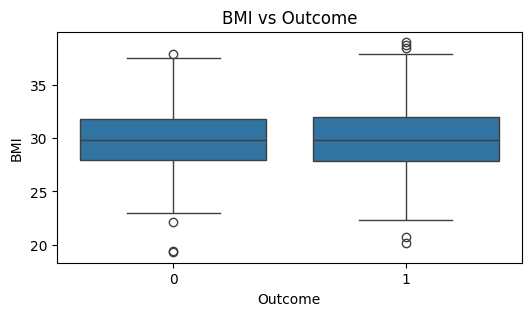

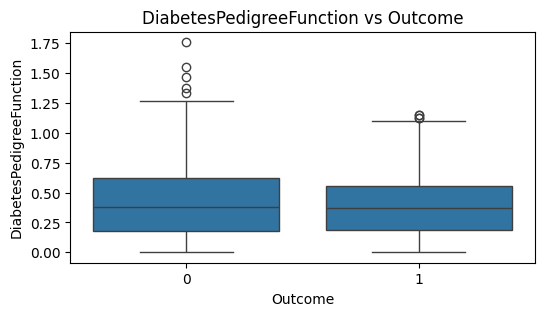

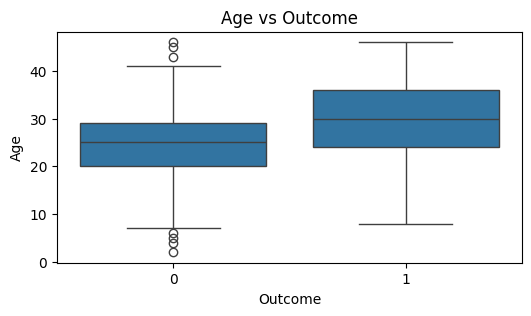

In [ ]:
# Visualize distributions per class
for col in df.columns[:-1]:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f"{col} vs Outcome")
    plt.show()


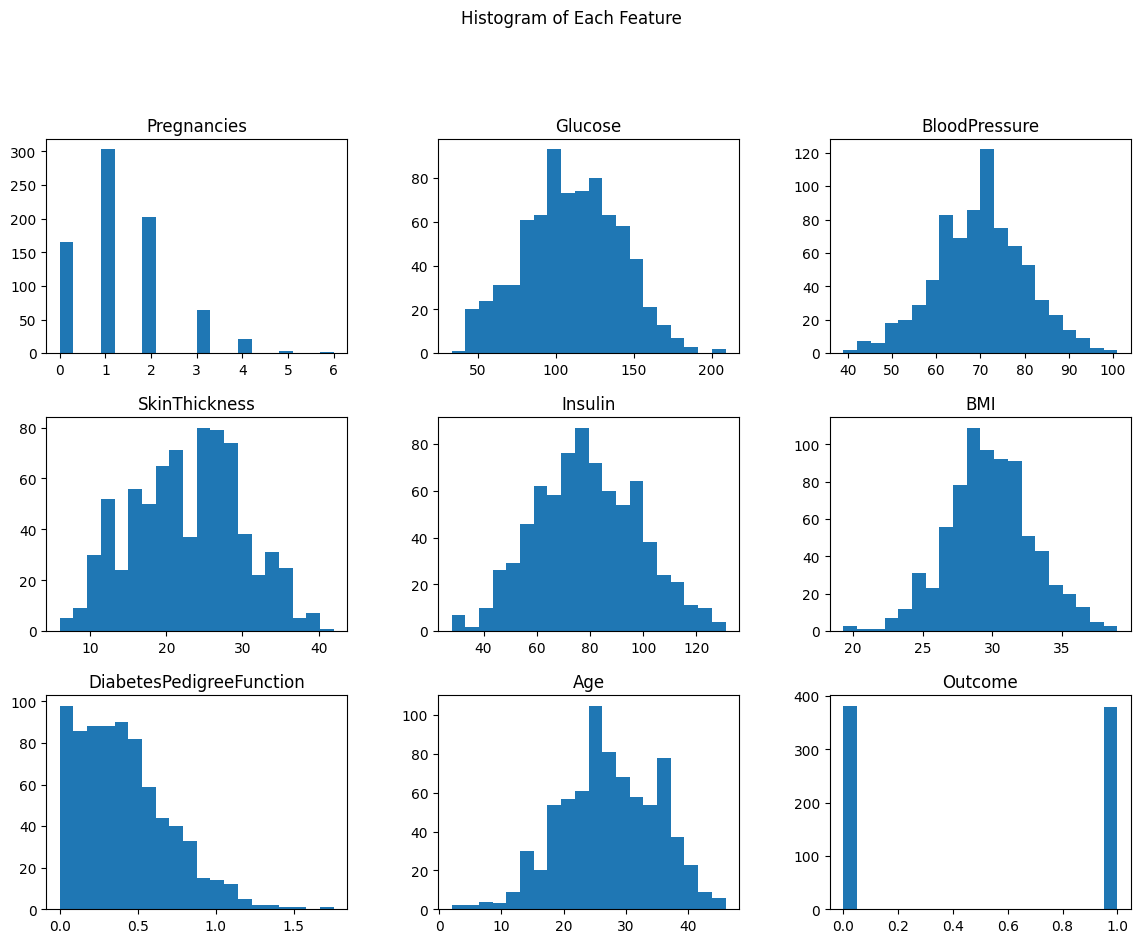

In [ ]:
# Histogram for each feature
df.hist(bins=20, figsize=(14, 10), grid=False)
plt.suptitle("Histogram of Each Feature", y=1.01)
plt.show()


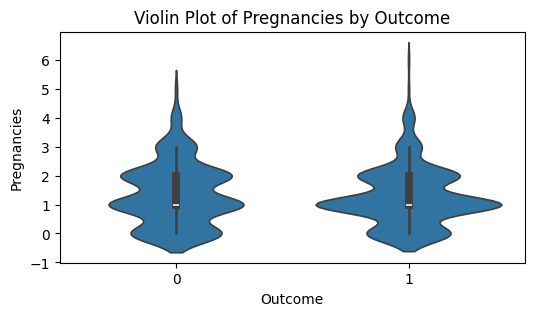

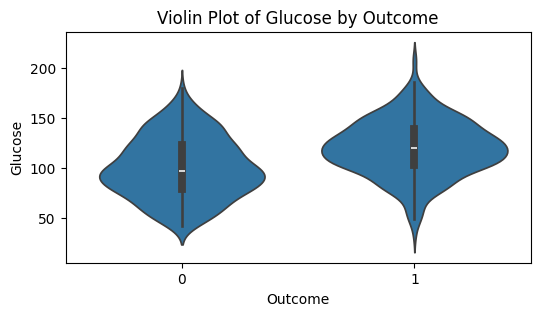

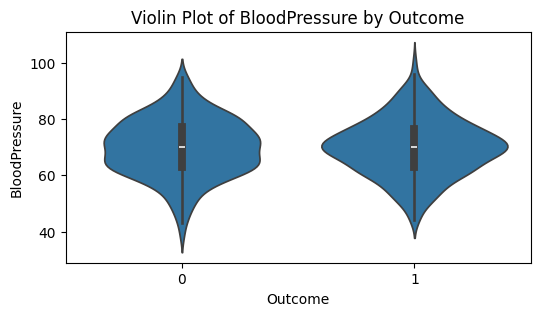

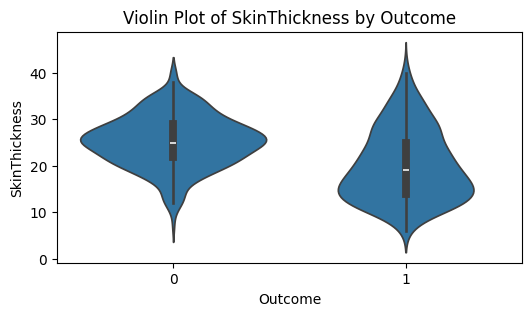

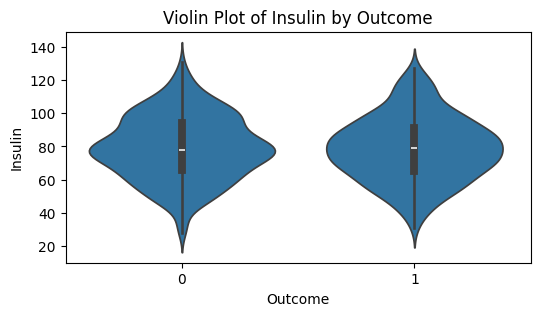

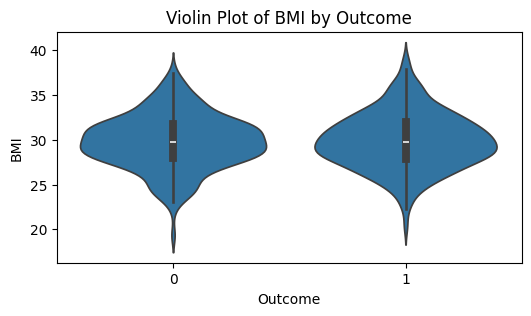

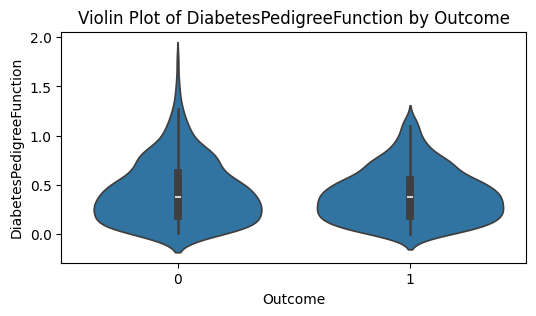

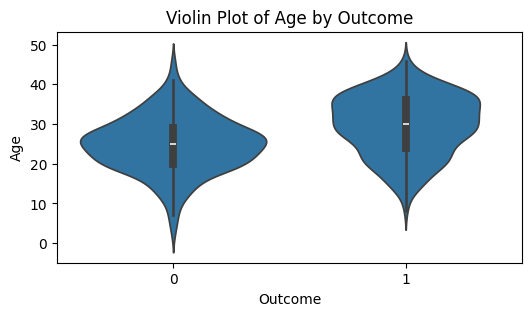

In [ ]:
for col in df.columns[:-1]:
    plt.figure(figsize=(6, 3))
    sns.violinplot(x='Outcome', y=col, data=df)
    plt.title(f"Violin Plot of {col} by Outcome")
    plt.show()


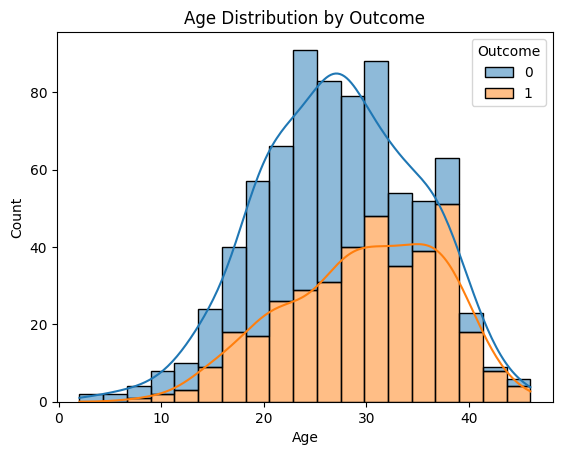

In [ ]:
sns.histplot(data=df, x='Age', hue='Outcome', multiple='stack', kde=True)
plt.title("Age Distribution by Outcome")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


In [ ]:
# Features and label
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [ ]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (608, 8)
Test shape: (153, 8)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features (important for most ML models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Training complete
print("Model trained successfully!")


Model trained successfully!


In [ ]:
# Predict test set
y_pred = model.predict(X_test_scaled)


Accuracy: 0.67


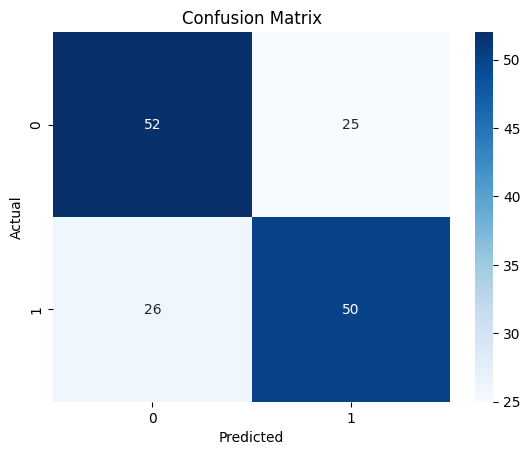

Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.68      0.67        77
           1       0.67      0.66      0.66        76

    accuracy                           0.67       153
   macro avg       0.67      0.67      0.67       153
weighted avg       0.67      0.67      0.67       153



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Detailed Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


In [ ]:
import joblib

# Save model and scaler
joblib.dump(model, "diabetes_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.2%}")


✅ Accuracy: 66.67%


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


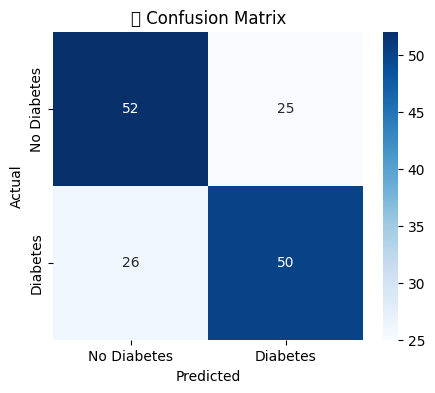

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("🧾 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("📋 Classification Report:\n", report)


📋 Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.68      0.67        77
           1       0.67      0.66      0.66        76

    accuracy                           0.67       153
   macro avg       0.67      0.67      0.67       153
weighted avg       0.67      0.67      0.67       153



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"🎯 Precision: {precision:.2f}")
print(f"🔁 Recall: {recall:.2f}")
print(f"📏 F1 Score: {f1:.2f}")


🎯 Precision: 0.67
🔁 Recall: 0.66
📏 F1 Score: 0.66


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


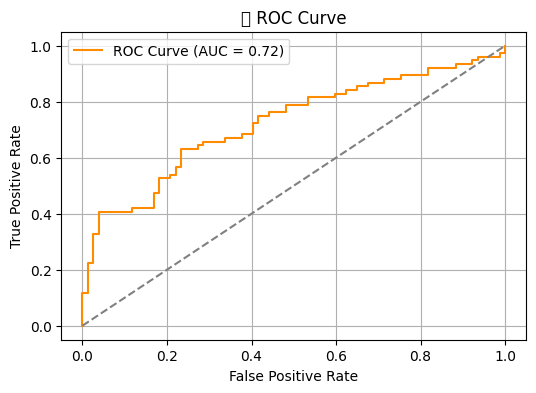

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probability scores
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("🔍 ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
pip install streamlit

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import joblib

# Load data
df = pd.read_csv("synthetic_diabetes.csv")

# Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Save model and scaler
joblib.dump(model, "diabetes_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']